In [12]:
!git clone https://github.com/Chandravardhan02/numpy-digit-classifier.git

Cloning into 'numpy-digit-classifier'...


In [ ]:
!pip install numpy matplotlib

Saving mnist_test.csv to mnist_test (6).csv
Saving mnist_train.csv to mnist_train (6).csv
Train shape: (60000, 784)
Test shape: (10000, 784)


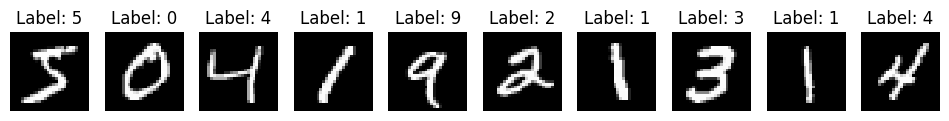

Epoch 1/10, Loss: 0.4663, Accuracy: 0.8699
Epoch 2/10, Loss: 0.4326, Accuracy: 0.8936
Epoch 3/10, Loss: 0.3345, Accuracy: 0.9027
Epoch 4/10, Loss: 0.2756, Accuracy: 0.9095
Epoch 5/10, Loss: 0.5214, Accuracy: 0.9167
Epoch 6/10, Loss: 0.8578, Accuracy: 0.9209
Epoch 7/10, Loss: 0.3895, Accuracy: 0.9253
Epoch 8/10, Loss: 0.1371, Accuracy: 0.9286
Epoch 9/10, Loss: 0.2802, Accuracy: 0.9321
Epoch 10/10, Loss: 0.1993, Accuracy: 0.9341


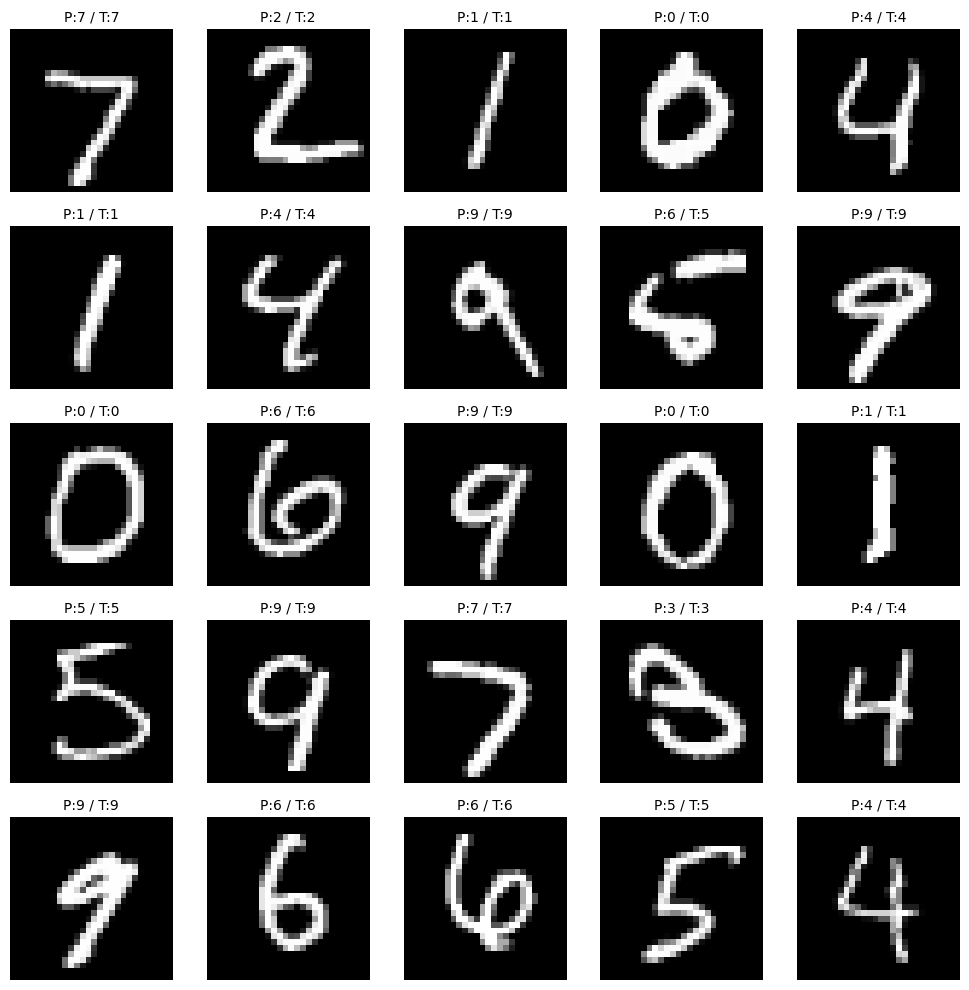

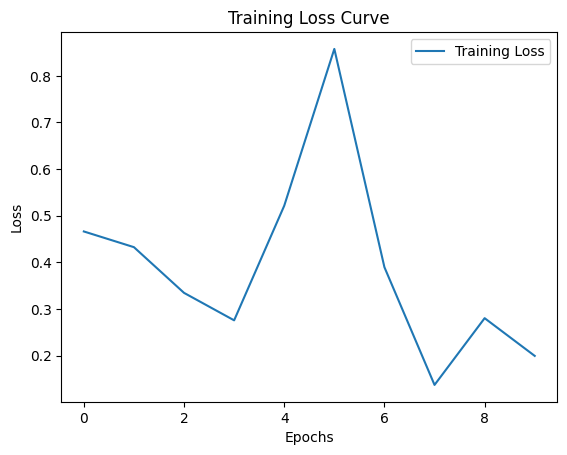

✅ Test Accuracy: 0.9341


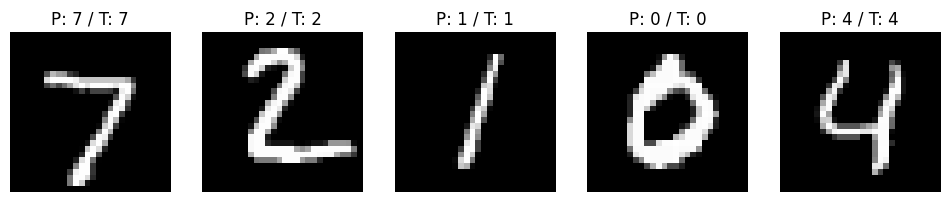

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
def load_data(path):
    data = np.loadtxt(path, delimiter=',', skiprows=1)
    X = data[:, 1:] / 255.0
    y = data[:, 0].astype(int)
    return X, y

X_train, y_train = load_data("mnist_train.csv")
X_test, y_test = load_data("mnist_test.csv")

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap="gray", interpolation="nearest")
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis("off")
plt.show()

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, lr=0.01):

        # Xavier initialization
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1. / input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1. / hidden_size)
        self.b2 = np.zeros((1, output_size))
        self.lr = lr
        self.losses = []

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(float)

    def forward(self, X):
        self.Z1 = X @ self.W1 + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = self.A1 @ self.W2 + self.b2
        self.A2 = self.softmax(self.Z2)
        return self.A2

    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_likelihood = -np.log(y_pred[range(m), y_true] + 1e-9)
        return np.sum(log_likelihood) / m

    def backward(self, X, y_true):
        m = X.shape[0]
        y_onehot = np.zeros_like(self.A2)
        y_onehot[np.arange(m), y_true] = 1

        dZ2 = self.A2 - y_onehot
        dW2 = self.A1.T @ dZ2 / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = dZ2 @ self.W2.T
        dZ1 = dA1 * self.relu_derivative(self.Z1)
        dW1 = X.T @ dZ1 / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # update params
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def predict(self, X):
        probs = self.forward(X)
        return np.argmax(probs, axis=1)

def train(model, X, y, epochs=10, batch_size=64):
    n_samples = X.shape[0]
    for epoch in range(epochs):
        indices = np.random.permutation(n_samples)
        X, y = X[indices], y[indices]

        for i in range(0, n_samples, batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]

            y_pred = model.forward(X_batch)
            loss = model.compute_loss(y_batch, y_pred)
            model.backward(X_batch, y_batch)

        model.losses.append(loss)
        y_pred_train = model.forward(X)
        acc = np.mean(np.argmax(y_pred_train, axis=1) == y)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")

model = NeuralNetwork(input_size=784, hidden_size=128, output_size=10, lr=0.01)
train(model, X_train, y_train, epochs=10, batch_size=64)

fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    img = X_test[i].reshape(28, 28)
    pred = model.predict(X_test[i].reshape(1, -1))[0]
    true = y_test[i]
    ax.imshow(img, cmap="gray", interpolation="nearest")
    ax.set_title(f"P:{pred} / T:{true}", fontsize=10)
    ax.axis("off")
plt.tight_layout()
plt.show()

plt.plot(model.losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()
y_pred_test = model.predict(X_test)
accuracy = np.mean(y_pred_test == y_test)
print("Test Accuracy:", accuracy)

fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray", interpolation="nearest")
    ax.set_title(f"P: {model.predict(X_test[i].reshape(1, -1))[0]} / T: {y_test[i]}")
    ax.axis("off")
plt.show()

